# Clustering with K-means and DBSCAN

For this project, we are going explore two clustering methods:
  - **K-Means**, which creates clusters based on a distance measure
  - **DBSCAN**, which creates clusters based on the density of the poitns in the vicinity of the data.
  
Using small example data sets, we will implement both algorithms and visualize the results.

In [365]:
# Do not import any libraries (i.e. sklearn, scipy, etc.), except for
# Python builtin libraries, unless otherwise specified.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Part 1: K-Means


In the first half, we will implement the basic $k$-means clustering algorithm, and apply that algorithm to a small data set provided with the project in the `data_kmeans.csv` file. We will build some helper functions along the way, test them, and put it all together to apply to our small example data set. 

In [366]:
# Load in our toy dataset.
df_kmeans = pd.read_csv('data_kmeans.csv')
df_kmeans

,x,y
0,-0.731698,-0.874311
1,-0.547702,-0.580320
2,-0.762840,-0.885572
3,-0.340946,-0.810411
4,-0.749065,-0.399218
...,...,...
445,-0.526437,0.543792
446,-0.706212,0.630983
447,-0.470187,0.763061
448,-0.395677,0.542105


## Q1.1 

**Write a function that returns $k$ random rows from a data frame**.
- To initialize the centroids, we pick $k$ random points from a DataFrame.
- Write a function `init_centroids(df_data, k)` that accepts two parameters:
    - A DataFrame `df_data`
    - An integer `k`.
- `init_centroids` should return the initial centroids for our k-means algorithm as a DataFrame.

*Notes*: 
- The index column of the returned DataFrame should range from $0$ to $(k - 1)$ inclusive so that we can use these as the centroid labels.  
- Make sure this function can handle any arbitrary number of features, not just our `x` and `y` columns.
- You **must** use the pandas [`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, with a random state of 42.


<!-- BEGIN QUESTION -->



In [367]:
def init_centroids(df_data: pd.DataFrame, k: int) -> pd.DataFrame:
    """Pick k random points from the dataset as the initial centroids for our
    k-means clustering algorithm.
    """
    df_centroids = df_data.sample(k, random_state = 42, ignore_index = True)
    return df_centroids 

In [368]:
# Test our init_centroids function
df_centroids = init_centroids(df_kmeans, 7)
df_centroids

,x,y
0,-0.633437,0.488756
1,-0.597736,0.632194
2,-0.635867,0.166613
3,-0.539351,-0.875532
4,-0.588597,0.293062
5,-0.127985,-0.136639
6,0.342579,0.211717


<!-- END QUESTION -->

## Q1.2 

**Write a function to assign every row in a data frame to a centroid**

- Write a function, `assign_to_centroid`, that accepts two parameters:
  - A DataFrame `df_data`, that represents our data to be clustered
  - A DataFrame `df_centroids`, which is of length `k` and contains the current centroids for our clusters. You generated this for Question 1.1.
- `assign_to_centroid` should return a Series, the same length as `df_data`, that contains the index of the **closest centroid** in `df_centroid`.  
  - Use Euclidean distance as your distance measure. 

*Example*: If a row of data contained the data point $(100, 123)$ and the three centroids were in a data frame that had the following information:
  - Index 0 : $(34, 34)$
  - Index 1 : $(0, 1)$
  - Index 2 : $(83, 99)$
  
The `assign_to_centroid` function would assign the index $2$ to that row of data. 


<!-- BEGIN QUESTION -->



In [28]:
#point1 = np.array((83,99))
#point2 = np.array((100,123))
#dist = np.linalg.norm(point1 - point2)
#dist
#110
#157
#29
#for index, row in df_kmeans.iterrows():
    #x = row['x'], row['y']
    #x = np.asarray(x)
    #print(index)

In [369]:
def assign_to_centroid(df_data: pd.DataFrame, df_centroids: pd.DataFrame) -> pd.Series:
    """Assign each row in df_data to the nearest centroid in df_centroids.
    Return a Series of the same length as df_data with the centroid index.
    """
    centroids = []
    distances = []
    for index, row in df_data.iterrows():
        p1 = row['x'], row['y']
        p1 = np.asarray(p1)
        
        for ind, r in df_centroids.iterrows():
            p2 = r['x'], r['y']
            p2 = np.asarray(p2)
            dist = np.linalg.norm(p1 - p2)
            distances.append(dist)
        
        min_val = min(distances)
        min_index = distances.index(min_val)
        centroids.append(min_index)
        distances = []
        
    
    centroids = pd.Series(centroids)
    return centroids

In [370]:
# Test our assign_to_centroid function. Do the lengths match?
s_centroid_assignment = assign_to_centroid(df_kmeans, df_centroids)
s_centroid_assignment

0      3
1      3
2      3
3      3
4      3
      ..
445    1
446    1
447    1
448    1
449    0
Length: 450, dtype: int64

<!-- END QUESTION -->

## Q1.3 

**Write a function that recomputes the centroids**

- Write a function, `compute_centroids`, that acceptss two parameters:
    - A DataFrame `df_data`, that represents our data to be clustered
    - A Series `s_centroid_assignment` of the same length that contains the label of the currently-assigned centroid for every row in `df_data`.
- `compute_centroids` should return the a data frame containing the mean value for each unique centroid.  These will be the new centroids we use for the next iteration of $k$-means.
    - This will look similar to the centroid DataFrame you computed for Q1.1.

*Note*: The indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`. 
- For example, if I found the mean value of `df_data` using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`. 



<!-- BEGIN QUESTION -->



In [371]:
def compute_centroids(df_data: pd.DataFrame, s_centroid_assignment: pd.Series) -> pd.DataFrame:
    """Compute a new set of centroids, by computing the mean point of 
    each centroid over the points assigned to it.
    """
    df_data['centroids'] = s_centroid_assignment
    slices = df_data.centroids.unique()
    mean_x_list = []
    mean_y_list = []
    for i in slices:
        sl = df_data.loc[df_data['centroids'] == i]
        mean_x = sl['x'].mean()
        mean_y = sl['y'].mean()
        
        mean_x_list.append(mean_x)
        mean_y_list.append(mean_y)
        
        
    #print(mean_x_list) 
    #print(mean_y_list)
    df_new_centroids = pd.DataFrame()
    df_new_centroids['x'] = mean_x_list
    df_new_centroids['y'] = mean_y_list
    df_data.drop(['centroids'],axis=1)
    
    return df_new_centroids

In [372]:
# Test it out
df_new_centroids = compute_centroids( df_kmeans, s_centroid_assignment)
df_new_centroids

,x,y
0,-0.696694,-0.699028
1,-0.721574,0.708343
2,-0.715983,0.500552
3,-0.546913,0.321364
4,-0.738268,-0.113830
5,-0.102365,-0.188876
6,0.523364,0.238569


<!-- END QUESTION -->

## Q1.4 

**Write a function that compares two centroid data frames**

- The stopping criterion for k-means is when our centroids have not moved since the last iteration.  
- Write a function `compare_centroids` that accepts two parameters:
    - `df_centroid_a`: A DataFrame of centroid centers (computed in Q1.1 / Q1.3)
    - `df_centroid_b`: A DataFrame of centroid centers (computed in Q1.1 / Q1.3)
- `compare_centroids` should return `True` or `False`, indicating if the centroids at each unique index in the data frame are equal. 


<!-- BEGIN QUESTION -->



In [373]:
def compare_centroids(df_centroid_a: pd.DataFrame, df_centroid_b: pd.DataFrame) -> bool:
    """Determine if two sets of centroids are the same.
    """
    centroids_match = df_centroid_a.equals(df_centroid_b)
    return centroids_match

In [374]:
# Test it out
print(compare_centroids(df_new_centroids, df_new_centroids)) # Should print True
print(compare_centroids(df_new_centroids, df_centroids)) # Should print False

True
False


<!-- END QUESTION -->

## Q1.5 

**Write a function that implements k-means**

- Write a function, `k_means`, that accepts two parameters:
    - A DataFrame `df_data` with values to cluster
    - The number of clusters to form, `k`. 
- `k_means` should return a Series the same length as `df_data` that contains the cluster assignment (an integer from $0 to $(k - 1)$ inclusive) for each row of data. 
- Your function should repeatedly adjust the clusters until they stop changing. Use the helper functions defined in the prior questions. 


<!-- BEGIN QUESTION -->



In [375]:
def k_means(df_data: pd.DataFrame, k: int) -> pd.Series:
    """Perform k-means clustering on the dataset df_data, using k clusters.
    This function returns a Series of cluster assignments for each row
    in df_data.
    """
    initial_centroids = init_centroids(df_data, k) #Dataframe
    
    assignment = assign_to_centroid(df_data, initial_centroids) #Series
    
    new_centroids = compute_centroids(df_data, assignment) #Dataframe
    
    new_assignment = assign_to_centroid(df_data, new_centroids) #Series
    
    compare = compare_centroids(initial_centroids, new_centroids) #BOol
    
    while(compare == False):
        initial_centroids = new_centroids
        assignment = assign_to_centroid(df_data, initial_centroids)
        
        new_centroids = compute_centroids(df_data, assignment) #Dataframe
        
        new_assignment = assign_to_centroid(df_data, new_centroids) #Series
        
        compare = compare_centroids(initial_centroids, new_centroids) #BOol
    s_cluster_assignment = new_assignment
    
    df_data.drop(['centroids'],axis=1)
    return s_cluster_assignment

In [376]:
# Call k_means with k = 5 to test
s_cluster_assignment = k_means(df_kmeans, 5)
s_cluster_assignment.value_counts()
s_cluster_assignment

0      0
1      0
2      0
3      0
4      0
      ..
445    1
446    1
447    1
448    1
449    1
Length: 450, dtype: int64

<!-- END QUESTION -->

## Q1.6 

**Plot the final clusters**

Plot the points in the `df_kmeans` data frame using a 2-D scatter plot.
- Assign a different color for each cluster. 
- Use the cluster assignments from the previous problem (`s_cluster_assignments`). There should be *five* clusters.
- Label your axes, and give the plot a title. 


<!-- BEGIN QUESTION -->



Text(0.5, 1.0, 'Clusters of the df_kmeans Data')

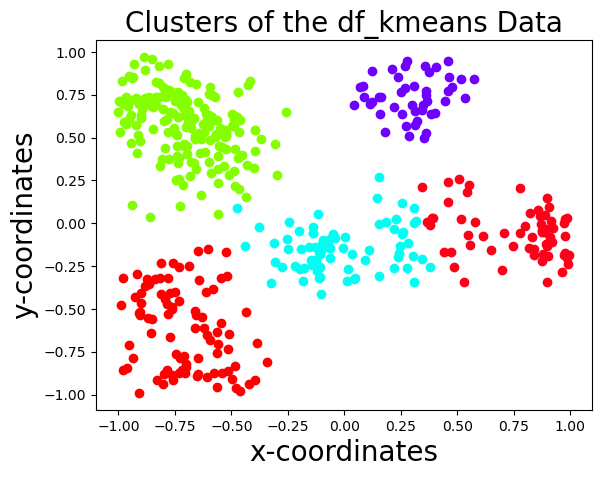

In [377]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

df_copy = df_kmeans.copy()
df_copy['label'] = s_cluster_assignment

u_labels = np.unique(df_copy['label'])
n = len(u_labels)
cmap = get_cmap(n)


for i in u_labels:
    filtered = df_copy[df_copy['label'] == i]
    plt.scatter(filtered['x'], filtered['y'], color = cmap(i))

plt.xlabel('x-coordinates', fontsize=20)
plt.ylabel('y-coordinates', fontsize=20)
plt.title('Clusters of the df_kmeans Data', fontsize=20)

<!-- END QUESTION -->

# Part 2: DBSCAN


In the first half, we will implement the DBSCAN density-based clustering algorithm, and apply that algorithm to a small data set provided with the project in the `data_dbscan.csv` file. As before, we will build some helper functions along the way, test them, and put it all together to apply to our small example data set. 

## Q2.1 

**Load the Density Data and try K-means**

1. Load in the data provided `data_dbscan.csv`
2. Cluster this data with k-means algorithm with $k=2$.
3. Visualize the results with a scatter plot, where the color indicates cluster membership. Label your axes, and give the plot a title. 
    - You don't have to write a description, but do you observe anything strange about the clusters? This dataset is a good example of a situation in which k-means is not good at clustering.


<!-- BEGIN QUESTION -->



Text(0.5, 1.0, 'K-means clusters of the db_scan Data')

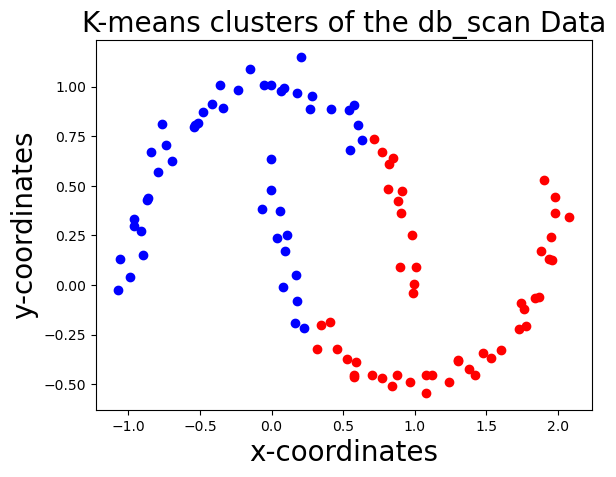

In [378]:
# Load the DBSCAN dataset (data_dbscan)
df_dbscan = pd.read_csv('data_dbscan.csv')

# Call k_means with k = 2
s_cluster_assignment = k_means(df_dbscan,2)
df_dbscan = df_dbscan.drop(['centroids'],axis=1)


# Plot the results
db_copy = df_dbscan.copy()
db_copy['label'] = s_cluster_assignment

u_labels = np.unique(db_copy['label'])
n = len(u_labels)
cmap = get_cmap(n)

#for i in u_labels:
filtered = db_copy[db_copy['label'] == 0]
plt.scatter(filtered['x'], filtered['y'], color = 'red')
filtered = db_copy[db_copy['label'] == 1]
plt.scatter(filtered['x'], filtered['y'], color = 'blue')

plt.xlabel('x-coordinates', fontsize=20)
plt.ylabel('y-coordinates', fontsize=20)
plt.title('K-means clusters of the db_scan Data', fontsize=20)


<!-- END QUESTION -->

## Q2.2 

**Write a function to implement RangeQuery**

Implement the RangeQuery routine for DBSCAN, following the below [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) on Wikipedia.

```
RangeQuery(DB, distFunc, Q, eps) {
    Neighbors N := empty list
    for each point P in database DB {                      /* Scan all points in the database */
        if distFunc(Q, P) ≤ eps then {                     /* Compute distance and check epsilon */
            N := N ∪ {P}                                   /* Add to result */
        }
    }
    return N
}
```

- Your function, `range_query`. should accept three inputs:
    - `df_data` is a DataFrame containing all the points in our dataset (`DB` in the pseudocode).
    - `q_index` is the data point/row of interest. The actual point can be obtained by calling `df_data.iloc[q_index]`. (`Q` in the pseudocode)
    - `eps` is a floating-point hyperparameter that indicates the radius from the point "Q" to search for neighbors.
    - (`distFunc` in the pseudocode is set as the Euclidean distance. For our purposes, you don't need to pass it in as you can just hard-code this inside your function.)
- `range_query` should return a DataFrame that is a slice of `df_data` containing **all points within `eps` distance of `Q`**, including `Q` itself.
    - Indices should be preserved (i.e., don't call `reset_index()`).


<!-- BEGIN QUESTION -->



In [250]:
df_dbscan

,x,y
0,1.08000,-0.544
1,0.84100,-0.510
2,0.96700,-0.491
3,1.24000,-0.487
4,0.77000,-0.467
...,...,...
95,-0.00477,1.010
96,-0.35800,1.010
97,-0.05180,1.010
98,-0.15400,1.090


In [379]:
def range_query(df_data: pd.DataFrame, q_index: int, eps: float) -> pd.DataFrame:
    """RangeQuery routine for DBSCAN. For the point at index q_index, return all
    points in the DataFrame within eps distance of the point. (L2 norm)"""
    neighbors = []
    idx = []
    q = df_data.iloc[q_index]
    q = np.asarray(q)
    for index, row in df_data.iterrows():
        p = row['x'], row['y']
        p = np.asarray(p)
        
        if(np.linalg.norm(p - q) <= eps):
            neighbors.append(p)
            idx.append(index)
    
    #print(idx)
    df_neighbors = pd.DataFrame(neighbors, columns=['x','y'])
    df_neighbors['idx'] = idx
    df_neighbors = df_neighbors.set_index('idx')
    return df_neighbors

        x      y
idx             
0    1.08 -0.544
6    1.12 -0.456
10   1.08 -0.455


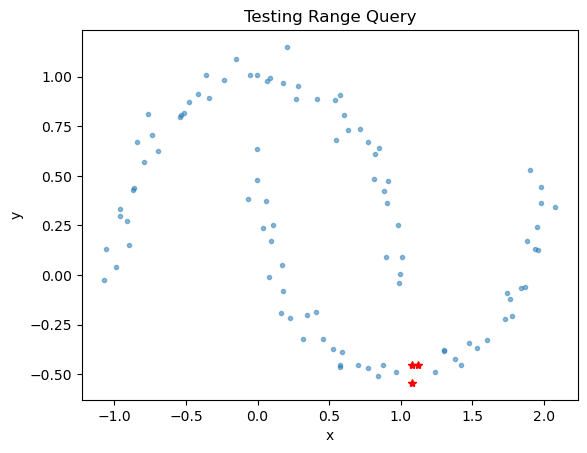

In [380]:
# Test it out.
df_n = range_query(df_dbscan, 0, 0.1 )
print(df_n)

# We've given you some plotting code to help you visualize the results.
plt.plot( df_dbscan['x'], df_dbscan['y'], '.', alpha = 0.5 )
plt.plot( df_n['x'], df_n['y'], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Range Query')
plt.show()

<!-- END QUESTION -->

## Q2.3 

**Write a function to implement DBSCAN**

Implement DBSCAN, following the below [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) from Wikipedia. 
- This pseudocode uses set notation. If you aren't familiar with set notation, [here](http://www.math.cmu.edu/~bkell/21110-2010s/sets.html) is a handy summary.

```
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}
```

- Your function `dbscan`, should accept three inputs:
    - `df_data` is a DataFrame containing all the points in our dataset (`DB` in the pseudocode).
    - `eps` is a floating-point hyperparameter that indicates the radius from the point "Q" to search for neighbors.
    - `min_pts` is an integer hyperparameter that is used to determine whether any point "Q" has a large enough number of neighbors.
    - (As before, `dist_func` can be assumed to be Euclidean distance. You only need this for `range_query`, which you already implemented, so there's no need to re-use it here.)
- `dbscan` should return a Series the same length as `df_data` that contains the cluster assignment for each point.
    - If a datapoint is classified as "noise", then the cluster assignment should be "0".
    - All the clusters DBSCAN discoevers should be numbered from $1$ to $k$ inclusive, where $k$ is found automatically by the algorithm and represents the total number of clusters created.

*Hints*:
- [iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) is a handy way to loop through a data frame.
    - However, if you modify the DataFrame within the loop, `iterrows` **doesn't add more iterations to the loop**. 
    - For example, if you start with a dataframe of length $n$ and add $3$ rows, then the `iterrows` will stop after $n$ rows. 
- For the inner loop, you'll need to use a native Python list to dynamically grow the `SeedSet S`. 
    - You can use the `extend` function to merge 2 lists together. For example:

```
x = [1,2,3]
y = [4,5,6]
x.extend(y) # sets x to the list [1, 2, 3, 4, 5, 6]
```
- The [continue](https://docs.python.org/3/tutorial/controlflow.html) statement can be helpful. If the interpreter reaches a `continue` statement, that iteration of the loop ends early at that point, and we move on to the next element in the loop.

*Testing your function*: Call `dbscan` with:
- The `df_dbscan` data frame
- `eps` set to 0.23
- `min_pts` set to 6
- Save the results to `s_cluster_assignments`.


<!-- BEGIN QUESTION -->



In [381]:
def dbscan(df_data: pd.DataFrame, eps: float, min_pts: int) -> pd.Series:
    """Perform DBSCAN clustering on the dataset df_data.
    This function returns a Series of cluster assignments for each row
    in df_data. If the cluster is 0, the data point is noise and not
    assigned a cluster.
    """
    
    # initialize all points as outliers
    point_label = [0] * len(df_data)
    point_count = []
    
    # initilize list for core/border points
    core = []
    border = []
    
    for i in range(len(df_data)):
        #point_count.append(range_query(df_data, i, eps))
        rq = range_query(df_data,i,eps)
        rq['index'] = rq.index
        point_count.append(rq['index'])
    #point_count[0]['index'] = point_count[0].index
    #print(point_count[0])
    for i in range(len(point_count)):
            if (len(point_count[i]) >= min_pts):
                point_label[i] = -1
                core.append(i)
            else:
                border.append(i)
                
    for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = -2
                    break
                    
    
    cluster = 1
    
    for i in range(len(point_label)):
            q = []
            if (point_label[i] == -1):
                point_label[i] = cluster
                for x in point_count[i]:
                    #print(x)
                    if(point_label[x] == -1):
                        q.append(x)
                        point_label[x] = cluster
                    elif(point_label[x] == -2):
                        point_label[x] = cluster
                while not (len(q) == 0):
                    neighbors = point_count[q.pop(0)]
                    #print(q[0])
                    #point_count.remove(q[0])
                    for y in neighbors:
                        if (point_label[y] == -1):
                            point_label[y] = cluster
                            q.append(y)
                        if (point_label[y] == -2):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster
    
    
    s_cluster_assignment = pd.Series(point_label)
    return s_cluster_assignment

In [382]:
# Test it out
s_cluster_assignment = dbscan(df_dbscan, 0.23, 6)
#print(type(s_cluster_assignment))
s_cluster_assignment.value_counts()

1    49
2    48
0     3
dtype: int64

<!-- END QUESTION -->

## Q2.4 

**Plot the final clusters** 

Plot the points in the `df_dbscan` data frame using a 2-D scatter plot.
- Assign a different color for each cluster.  
- Use the cluster assignments from the previous problem (`s_cluster_assignments`).
- Label your axes, and give the plot a title.


<!-- BEGIN QUESTION -->



Text(0.5, 1.0, 'DBSCAN Clusters of the df_dbscan Data')

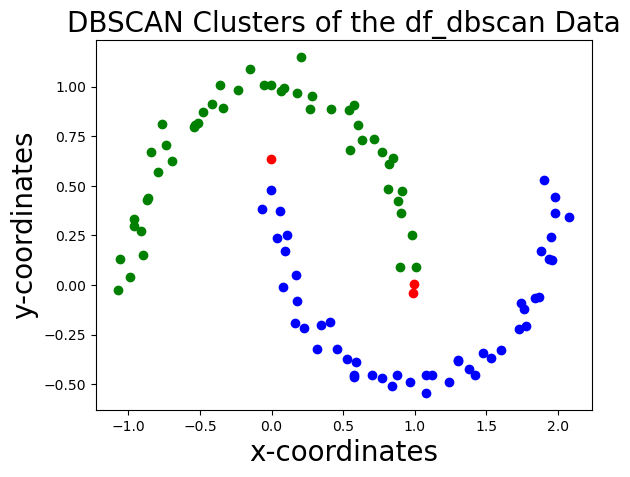

In [392]:
db_copy = df_dbscan.copy()
db_copy['label'] = s_cluster_assignment

u_labels = np.unique(db_copy['label'])
n = len(u_labels)
cmap = get_cmap(n)

'''for i in u_labels:
    filtered = db_copy[db_copy['label'] == i]
    plt.scatter(filtered['x'], filtered['y'], color = cmap(i))'''

filtered = db_copy[db_copy['label'] == 0]
plt.scatter(filtered['x'], filtered['y'], color = 'red')
filtered = db_copy[db_copy['label'] == 1]
plt.scatter(filtered['x'], filtered['y'], color = 'blue')

filtered = db_copy[db_copy['label'] == 2]
plt.scatter(filtered['x'], filtered['y'], color = 'green')

plt.xlabel('x-coordinates', fontsize=20)
plt.ylabel('y-coordinates', fontsize=20)
plt.title('DBSCAN Clusters of the df_dbscan Data', fontsize=20)


<!-- END QUESTION -->

## Q2.5 

**Compare your results to the scikit-learn library**

- Import [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) from scikit-learn.
- Use the same `eps` and `min_samples` parameters as Q2.3.
- Compare the cluster labels from your implementation to those generated by scikit-learn's.

Add some commentary about how you think the results compare. Use the same data and values for eps and minPts.


The results from my implementation and the sklearn are very similar. They each are the same length (100 since the data has 100 entries). I used the 0 label to assign a point that is just noise and not assigned to a cluster. Sklearn uses -1 instead. I also used labels 1 and 2 to assign a point to a cluster, sklearn uses 0 and 1. However it is understandable why sklearn uses -1 for noise and then sequential numbers after that to mark different clusters. Aside from that difference, I also notice that the order of the labels are the same as well and so do the sample indices.

In [393]:
from sklearn.cluster import DBSCAN

# Define your clustering model and fit it to df_dbscan.
clustering = DBSCAN(eps=0.23, min_samples=6).fit(df_dbscan)

In [394]:
# Analyze and compare their clusters to yours.
print(clustering.labels_)
print()
print(list(s_cluster_assignment))
print(clustering.core_sample_indices_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  1  0 -1  1  0  1  1  0  1  0  1  0  0  0
  0  0  1  1  1  1  0  1  0  0  0  1  1  1  0  1  0  1  0 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 38 41 42 43 44 46 47 48 49 50 51 52 53 56 57 59 60
 61 63 65 68 69 70 71 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 91 92 93 94 95 96 97]


<!-- END QUESTION -->

